In [481]:
import os
import re
import json
import nltk
import string
import enchant
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

#### Data Cleaning
* check null value
* convert to lowercase
* clean @
* clean URLs
* clean numbers
* clean special characters
* clean non-english words

In [482]:
# clean @at, namely clean username
def clean_at(data):
    return re.sub('@[^\s]+', ' ', data)

# clean URLs
def clean_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

# clean numbers
def clean_numbers(data):
    return re.sub('[0-9]+', '', data)

# clean non-english words
def clean_non_english_word(data):
    d = enchant.Dict('en_US') # english dictionary
    return ' '.join([word for word in data.split() if d.check(word)])

In [483]:
# 其他
# remove stopwords
# remove punctuations
# tokenizer
# Stemming
# Lemmatiztion
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
def clean_stopwords(data):
    return ' '.join([word for word in data.split() if word not in stopwords])

def clean_punctuations(data):
    punctuations_list = string.punctuation
    translator = str.maketrans('', '', punctuations_list)
    return data.translate(translator)


##### Preprocessing Testing Set 

In [484]:
X_test = {}
file_dir = 'project-data/tweet-objects/'
test_ids = open('project-data/test.data.txt').read().replace('\n', ',').split(',')[:-1]
files = [id+'.json' for id in test_ids]

for file in files:
    with open(file_dir+file) as json_file:
        data = json.load(json_file)
        id = data['id']
        text = data['text']
        X_test[id] = text

In [485]:
# orignal data inspect
X_test = pd.DataFrame(list(X_test.items()), columns=['id', 'text'])
X_test

,id,text
0,1246482832316301319,How Does COVID-19 Spread? https://t.co/TXHDeUp...
1,1247355493988909056,"@WCCO Thanks, WCCO! You are the only Station I..."
2,1252279738099433473,"@brain_warrior I hate to keep saying it, but C..."
3,1251884146403815428,"@brain_warrior If you don’t believe me, all yo..."
4,1252033306100670464,@brain_warrior Tell that to the people that ar...
...,...,...
7752,1222929611232817159,@crbabecrab @WHO @DrTedros @WHOWPRO @WHOSEARO ...
7753,1222944075826884608,@WHO @DrTedros @WHOWPRO @WHOSEARO @WHO_Europe ...
7754,1239324381215707139,Can CoVID-19 be caught from a person who has n...
7755,1239324383396716546,"However, many people with #COVID-19 experience..."


In [486]:
# check null
print(np.sum(X_test.isnull().any(axis=1)))

0


In [487]:
# convert to lower case
X_test['text'] = X_test['text'].str.lower()
X_test.head()

,id,text
0,1246482832316301319,how does covid-19 spread? https://t.co/txhdeup...
1,1247355493988909056,"@wcco thanks, wcco! you are the only station i..."
2,1252279738099433473,"@brain_warrior i hate to keep saying it, but c..."
3,1251884146403815428,"@brain_warrior if you don’t believe me, all yo..."
4,1252033306100670464,@brain_warrior tell that to the people that ar...


In [488]:
# clean @at, namely clean username
X_test['text'] = X_test['text'].apply(lambda x:clean_at(x))
X_test.head()

,id,text
0,1246482832316301319,how does covid-19 spread? https://t.co/txhdeup...
1,1247355493988909056,"thanks, wcco! you are the only station i can..."
2,1252279738099433473,"i hate to keep saying it, but capitalism wil..."
3,1251884146403815428,"if you don’t believe me, all you have to do ..."
4,1252033306100670464,tell that to the people that are “protesting”.🤣


In [489]:
# clean URLs
X_test['text'] = X_test['text'].apply(lambda x:clean_URLs(x))
X_test.head()

,id,text
0,1246482832316301319,how does covid-19 spread?
1,1247355493988909056,"thanks, wcco! you are the only station i can..."
2,1252279738099433473,"i hate to keep saying it, but capitalism wil..."
3,1251884146403815428,"if you don’t believe me, all you have to do ..."
4,1252033306100670464,tell that to the people that are “protesting”.🤣


In [490]:
# clean numbers
X_test['text'] = X_test['text'].apply(lambda x: clean_numbers(x))
X_test.head()

,id,text
0,1246482832316301319,how does covid- spread?
1,1247355493988909056,"thanks, wcco! you are the only station i can..."
2,1252279738099433473,"i hate to keep saying it, but capitalism wil..."
3,1251884146403815428,"if you don’t believe me, all you have to do ..."
4,1252033306100670464,tell that to the people that are “protesting”.🤣


In [491]:
# clean special character
X_test['text'] = X_test['text'].str.replace("[^a-zA-Z#]", " ")
X_test['text'] = X_test['text'].str.replace(r'\B#\w*[a-zA-Z]+\w*', '')
X_test['text'] = X_test['text'].str.replace('@[A-Za-z0-9]+', '') 
X_test.head()

/var/folders/xl/l07cxwy94pgcqqp6n3npqbt80000gn/T/ipykernel_22404/2786417412.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test['text'] = X_test['text'].str.replace("[^a-zA-Z#]", " ")
/var/folders/xl/l07cxwy94pgcqqp6n3npqbt80000gn/T/ipykernel_22404/2786417412.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test['text'] = X_test['text'].str.replace(r'\B#\w*[a-zA-Z]+\w*', '')
/var/folders/xl/l07cxwy94pgcqqp6n3npqbt80000gn/T/ipykernel_22404/2786417412.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test['text'] = X_test['text'].str.replace('@[A-Za-z0-9]+', '')


,id,text
0,1246482832316301319,how does covid spread
1,1247355493988909056,thanks wcco you are the only station i can...
2,1252279738099433473,i hate to keep saying it but capitalism wil...
3,1251884146403815428,if you don t believe me all you have to do ...
4,1252033306100670464,tell that to the people that are protesting


In [492]:
# clean non-english words
X_test['text'] = X_test['text'].apply(lambda x: clean_non_english_word(x))
X_test.head()

,id,text
0,1246482832316301319,how does spread
1,1247355493988909056,thanks you are the only station i can trust in...
2,1252279738099433473,i hate to keep saying it but capitalism will i...
3,1251884146403815428,if you don t believe me all you have to do is ...
4,1252033306100670464,tell that to the people that are protesting


In [493]:
# 其他操作 去掉stopwords
X_test['text'] = X_test['text'].apply(lambda x: clean_stopwords(x))
X_test.head()

,id,text
0,1246482832316301319,spread
1,1247355493988909056,thanks station trust media provide true news p...
2,1252279738099433473,hate keep saying capitalism implode without virus
3,1251884146403815428,believe look changes week humanity
4,1252033306100670464,tell people protesting


In [494]:
# 其他操作 去掉punctuations
X_test['text'] = X_test['text'].apply(lambda x: clean_punctuations(x))
X_test.head()

,id,text
0,1246482832316301319,spread
1,1247355493988909056,thanks station trust media provide true news p...
2,1252279738099433473,hate keep saying capitalism implode without virus
3,1251884146403815428,believe look changes week humanity
4,1252033306100670464,tell people protesting


In [495]:
# 其他操作 token
tokenizer = RegexpTokenizer(r'\w+')

X_test['text'] = X_test['text'].apply(tokenizer.tokenize)
X_test.head()

,id,text
0,1246482832316301319,[spread]
1,1247355493988909056,"[thanks, station, trust, media, provide, true,..."
2,1252279738099433473,"[hate, keep, saying, capitalism, implode, with..."
3,1251884146403815428,"[believe, look, changes, week, humanity]"
4,1252033306100670464,"[tell, people, protesting]"


In [496]:
# 其他操作 stemming NLTK 有些问题， people， e的问题 TO DISUCSS
st = PorterStemmer()

def stemming(tweet):
    tweet = [st.stem(word) for word in tweet]
    return tweet

X_test['text'] = X_test['text'].apply(lambda x: stemming(x))
X_test.head()

,id,text
0,1246482832316301319,[spread]
1,1247355493988909056,"[thank, station, trust, media, provid, true, n..."
2,1252279738099433473,"[hate, keep, say, capit, implod, without, viru]"
3,1251884146403815428,"[believ, look, chang, week, human]"
4,1252033306100670464,"[tell, peopl, protest]"


In [497]:
# 其他操作 lemmatiztion
def lemmatize(tweet):
    wnl = WordNetLemmatizer()
    tweet = [wnl.lemmatize(word) for word in tweet]
    return tweet

X_test['text'] = X_test['text'].apply(lambda x: lemmatize(x))
X_test.head()

,id,text
0,1246482832316301319,[spread]
1,1247355493988909056,"[thank, station, trust, medium, provid, true, ..."
2,1252279738099433473,"[hate, keep, say, capit, implod, without, viru]"
3,1251884146403815428,"[believ, look, chang, week, human]"
4,1252033306100670464,"[tell, peopl, protest]"


##### Preprocessing Training Set 

In [498]:
# train 这里还在跑，我先把目前的搞一下
train_ids = pd.read_csv('project-data/train.data.txt', sep=' ', header=None, names=['id'])
train_label = pd.read_csv('project-data/train.label.txt', header=None, names=['label'])

In [499]:
tmp = pd.concat([train_ids, train_label], axis=1)
tmp

,id,label
0,"1250219300389974016,1250219116993974272,125021...",nonrumour
1,"554886875303780352,554894001946759168,55495964...",rumour
2,"1237901309011021825,1237901311439450112,123986...",nonrumour
3,"524958128392376320,524961934064754688,52495902...",nonrumour
4,"1239295488677085185,1239562248990806016",nonrumour
...,...,...
1890,"671181758692507648,671200376843067392,67118426...",rumour
1891,"672513234419638273,672513853645717504,67258916...",rumour
1892,"553508098825261056,553511652587360256,55350954...",nonrumour
1893,"1249479605582327808,1249392473073487873,124953...",nonrumour


In [500]:
train = {}
for i in range(len(tmp)):
    label = tmp['label'][i]
    ids = tmp['id'][i].split(',')
    for id in ids:
        train[id] = label

In [501]:
# 目前下载好的tmp，后面这里下载好会换成全部的数据
downloaded_train = os.listdir('project-data/train-tweet-objects')[:-10] # 防止正在下载不全
downloaded_ids = [fname[:-5] for fname in downloaded_train]
train_tmp = {}
for id in downloaded_ids:
    label = train[id]
    train_tmp[id] = label

train_tmp = pd.DataFrame(list(train_tmp.items()), columns=['id', 'label'])
train_tmp.head()

,id,label
0,1261796982504513536,nonrumour
1,1250079431126913025,nonrumour
2,501833052482330624,nonrumour
3,1262429514954661896,nonrumour
4,524187414118428674,rumour


In [502]:
X_train = {}
file_dir = 'project-data/train-tweet-objects/'
for file in downloaded_train:
    with open(file_dir+file) as json_file:
        data = json.load(json_file)
        id = data['id']
        text = data['text']
        X_train[id] = text

X_train = pd.DataFrame(list(X_train.items()), columns=['id', 'text'])
X_train.head()

,id,text
0,1261796982504513536,@msbradleyrox @osstf It was indicated yesterda...
1,1250079431126913025,@citizentvkenya Lol
2,501833052482330624,They posted the video of it: http://t.co/zOoE0...
3,1262429514954661896,@Covfefe2020Eas @clevelanddotcom BTW - We are ...
4,524187414118428674,@piersmorgan Apocalypse Averted!!! @BanksyOff...


In [503]:
# check null
print(np.sum(X_train.isnull().any(axis=1)))

0


In [504]:
# convert to lower case
X_train['text'] = X_train['text'].str.lower()
X_train.head()

,id,text
0,1261796982504513536,@msbradleyrox @osstf it was indicated yesterda...
1,1250079431126913025,@citizentvkenya lol
2,501833052482330624,they posted the video of it: http://t.co/zooe0...
3,1262429514954661896,@covfefe2020eas @clevelanddotcom btw - we are ...
4,524187414118428674,@piersmorgan apocalypse averted!!! @banksyoff...


In [505]:
# clean @at, namely clean username
X_train['text'] = X_train['text'].apply(lambda x:clean_at(x))
X_train.head()

,id,text
0,1261796982504513536,it was indicated yesterday that we would h...
1,1250079431126913025,lol
2,501833052482330624,they posted the video of it: http://t.co/zooe0...
3,1262429514954661896,btw - we are not testing for asymptomatic....
4,524187414118428674,apocalypse averted!!!


In [506]:
# clean URLs
X_train['text'] = X_train['text'].apply(lambda x:clean_URLs(x))
X_train.head()

,id,text
0,1261796982504513536,it was indicated yesterday that we would h...
1,1250079431126913025,lol
2,501833052482330624,they posted the video of it: -
3,1262429514954661896,btw - we are not testing for asymptomatic....
4,524187414118428674,apocalypse averted!!!


In [507]:
# clean numbers
X_train['text'] = X_train['text'].apply(lambda x: clean_numbers(x))
X_train.head()

,id,text
0,1261796982504513536,it was indicated yesterday that we would h...
1,1250079431126913025,lol
2,501833052482330624,they posted the video of it: -
3,1262429514954661896,btw - we are not testing for asymptomatic....
4,524187414118428674,apocalypse averted!!!


In [508]:
# clean special character
X_train['text'] = X_train['text'].str.replace("[^a-zA-Z#]", " ")
X_train['text'] = X_train['text'].str.replace(r'\B#\w*[a-zA-Z]+\w*', '')
X_train['text'] = X_train['text'].str.replace('@[A-Za-z0-9]+', '') 
X_train.head()

# 清理之后还需要检查一下null, 词全部清掉了 

/var/folders/xl/l07cxwy94pgcqqp6n3npqbt80000gn/T/ipykernel_22404/2093578848.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train['text'] = X_train['text'].str.replace("[^a-zA-Z#]", " ")
/var/folders/xl/l07cxwy94pgcqqp6n3npqbt80000gn/T/ipykernel_22404/2093578848.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train['text'] = X_train['text'].str.replace(r'\B#\w*[a-zA-Z]+\w*', '')
/var/folders/xl/l07cxwy94pgcqqp6n3npqbt80000gn/T/ipykernel_22404/2093578848.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train['text'] = X_train['text'].str.replace('@[A-Za-z0-9]+', '')


,id,text
0,1261796982504513536,it was indicated yesterday that we would h...
1,1250079431126913025,lol
2,501833052482330624,they posted the video of it
3,1262429514954661896,btw we are not testing for asymptomatic ...
4,524187414118428674,apocalypse averted


In [509]:
# clean non-english words
X_train['text'] = X_train['text'].apply(lambda x: clean_non_english_word(x))
X_train.head()

# TO DISCUSS 清理之后还需要检查一下null, 词全部清掉了, token之后会变成空的[], 抽feature估计会报错

,id,text
0,1261796982504513536,it was indicated yesterday that we would hear ...
1,1250079431126913025,
2,501833052482330624,they posted the video of it
3,1262429514954661896,we are not testing for asymptomatic we do not ...
4,524187414118428674,apocalypse averted


In [510]:
train = pd.concat([X_train, train_tmp['label']], axis=1)
train.head()

,id,text,label
0,1261796982504513536,it was indicated yesterday that we would hear ...,nonrumour
1,1250079431126913025,,nonrumour
2,501833052482330624,they posted the video of it,nonrumour
3,1262429514954661896,we are not testing for asymptomatic we do not ...,nonrumour
4,524187414118428674,apocalypse averted,rumour


#### Data Visualization

##### Word Frequency Visualization

In [511]:
def visualize_word_freq(set, label_type, set_type, output_fname):
    vectorizer = CountVectorizer()
    data_frequency = vectorizer.fit_transform(set['text'])

    # Summall frequenies for each word in all data
    sum_frequencies = np.sum(data_frequency , axis=0)
    frequency = np.squeeze(np.asarray(sum_frequencies))
    frequency_df = pd.DataFrame([frequency], columns=vectorizer.get_feature_names()).transpose()
    frequency_df = frequency_df.sort_values(0, ascending=False)

    word_cnt = frequency_df[0][:50].index
    title = "Word Frequency in {} Tweets of {} Set".format(label_type, set_type)
    plt.figure(figsize=(10,5))
    plt.bar(np.arange(50), frequency_df[0][:50], width=0.8, color = sns.color_palette("bwr"), alpha=0.5, 
                edgecolor = "black", capsize=8, linewidth=1);
    plt.xticks(np.arange(50), word_cnt, rotation=90, size=14);
    plt.xlabel("50 most frequent words", size=14);
    plt.ylabel("Frequency", size=14);
    plt.title(title, size=18)
    plt.grid(False);
    plt.gca().spines["top"].set_visible(False);
    plt.gca().spines["right"].set_visible(False);
    plt.savefig('images/'+output_fname, dpi=300)
    plt.show() 

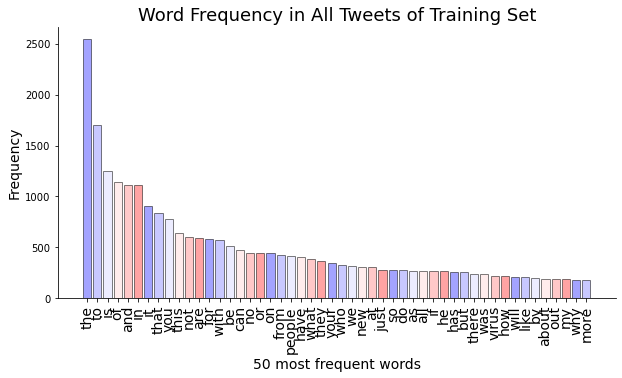

In [512]:
visualize_word_freq(X_train, 'All', 'Training', 'top-50-most-freq-words-train-set.png')

In [513]:
visualize_word_freq(X_test, 'All', 'Testing', 'top-50-most-freq-words-test-set.png')

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
train_rumour_data = train[train['label']=='rumour']
train_rumour_data.head()

,id,text,label
4,524187414118428674,apocalypse averted,rumour
6,496698916981997568,,rumour
8,560639462070157312,well they better stop now i can t believe of a...,rumour
11,669360468591517697,i d buy that issue,rumour
15,638109909381447680,its serious business out here,rumour


In [ ]:
train_nonrumour_data = train[train['label']=='nonrumour']
train_nonrumour_data.head()

,id,text,label
0,1261796982504513536,it was indicated yesterday that we would hear ...,nonrumour
1,1250079431126913025,,nonrumour
2,501833052482330624,they posted the video of it,nonrumour
3,1262429514954661896,we are not testing for asymptomatic we do not ...,nonrumour
5,407939798922297344,amp roger ever missed never gotten and eternal...,nonrumour


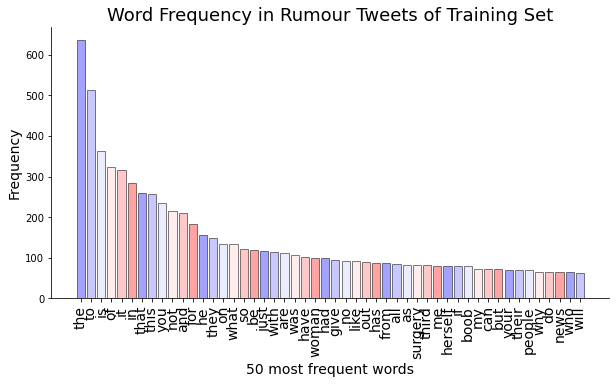

In [ ]:
visualize_word_freq(train_rumour_data, 'Rumour', 'Training', 'top-50-most-freq-rumour-words-train-set.png')

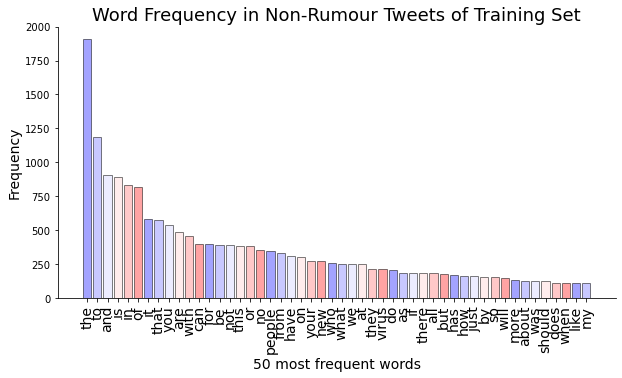

In [ ]:
visualize_word_freq(train_nonrumour_data, 'Non-Rumour', 'Training', 'top-50-most-freq-nonrumour-words-train-set.png')

In [ ]:
# TODO Development Set 

##### WordCloud Visualization

In [ ]:
def visualize_wordcloud(wc_str, label_type, set_type, output_fname):
    mask = np.array(Image.open('images/twitter-icon.jpeg'))
    wc = WordCloud(background_color='white', colormap='Set2', mask=mask).generate(wc_str)
    title = 'WordCloud of {} Tweets in {} Set'.format(label_type, set_type)
    plt.figure(figsize=(10,10), facecolor="w")
    plt.title(title, size=18)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('images/'+output_fname, dpi=300)
    plt.show()

In [ ]:
train_all_string = pd.Series(X_train['text']).str.cat(sep=' ')
train_rumour_string = pd.Series(train_rumour_data['text']).str.cat(sep=' ')
train_nonrumour_string = pd.Series(train_nonrumour_data['text']).str.cat(sep=' ')

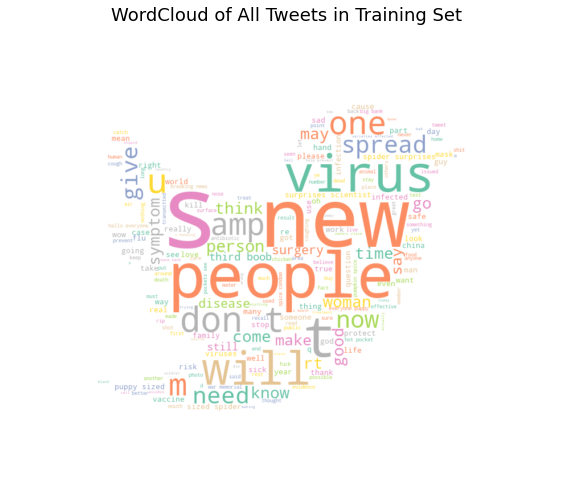

In [ ]:
visualize_wordcloud(train_all_string, 'All', 'Training', 'train-all-wc.png')

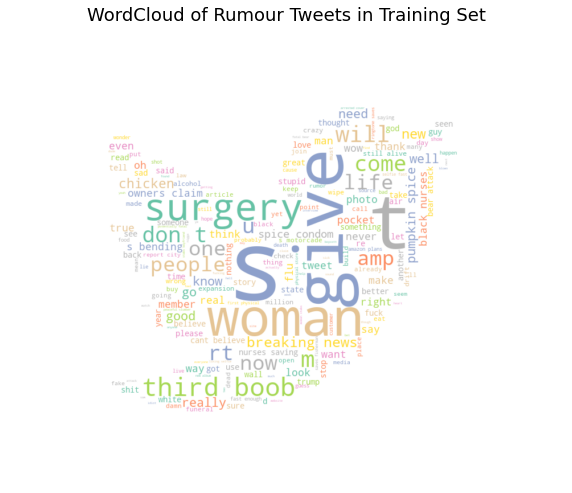

In [ ]:
visualize_wordcloud(train_rumour_string, 'Rumour', 'Training', 'train-rumour-wc.png')

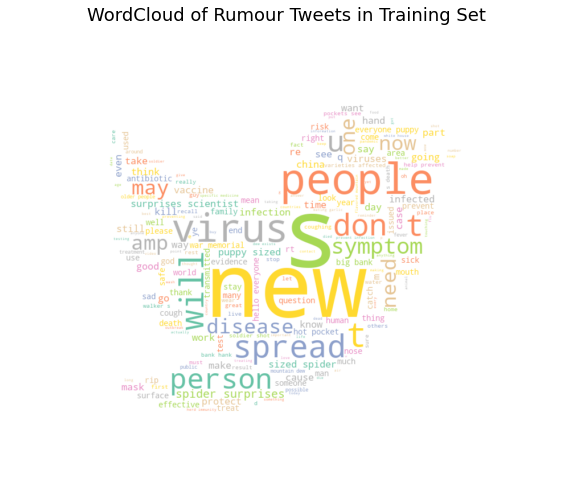

In [ ]:
visualize_wordcloud(train_nonrumour_string, 'Rumour', 'Training', 'train-nonrumour-wc.png')

In [ ]:
# TODO development set

##### Label Distribution Visualization

In [ ]:
def visualize_label_distribution(set, set_type, output_fname):
    rumour_cnt = set['label'].tolist().count('rumour')
    nonrumour_cnt = set['label'].tolist().count('nonrumour')
    title = 'Label Distribution in {} Set'.format(set_type)
    sizes = [rumour_cnt, nonrumour_cnt]
    colors = ['#a3a3ff', '#ffa3a3']
    labels = ['Rumour', 'Non-rumour']
    explode = (0.03, 0)
    plt.title(title, size=14)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.savefig('images/'+output_fname, dpi=300)
    plt.show()

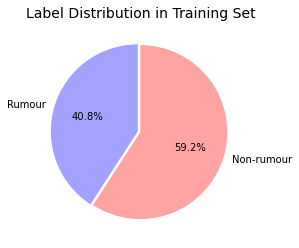

In [ ]:
visualize_label_distribution(train, 'Training', 'train-label-distribution.png')

In [ ]:
# TODO development set